In [3]:
import os, shutil, random, glob
import cv2
import numpy as np
import pandas as pd

# os.environ["CUDA_VISIBLE_DEVICES"] = "2"
# CUDA_VISIBLE_DEVICES = 2

import keras
from keras.datasets import cifar10
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
import matplotlib.pyplot as plt

In [4]:
resize = 224
def load_data():
    imgs = os.listdir("./train/")
    num = len(imgs)
    train_data = np.empty((5000, resize, resize, 3), dtype="int32")
    train_label = np.empty((5000, ), dtype="int32")
    test_data = np.empty((5000, resize, resize, 3), dtype="int32")
    test_label = np.empty((5000, ), dtype="int32")
    for i in range(5000):
        if i % 2:
            train_data[i] = cv2.resize(cv2.imread('./train/' + 'dog.' + str(i) + '.jpg'), (resize, resize))
            train_label[i] = 1
        else:
            train_data[i] = cv2.resize(cv2.imread('./train/' + 'cat.' + str(i) + '.jpg'), (resize, resize))
            train_label[i] = 0
    for i in range(5000, 10000):
        if i % 2:
            test_data[i-5000] = cv2.resize(cv2.imread('./train/' + 'dog.' + str(i) + '.jpg'), (resize, resize))
            test_label[i-5000] = 1
        else:
            test_data[i-5000] = cv2.resize(cv2.imread('./train/' + 'cat.' + str(i) + '.jpg'), (resize, resize))
            test_label[i-5000] = 0
    return train_data, train_label, test_data, test_label

In [5]:
train_data, train_label, test_data, test_label = load_data()
train_data, test_data = train_data.astype('float32'), test_data.astype('float32')
train_data, test_data = train_data/255, test_data/255

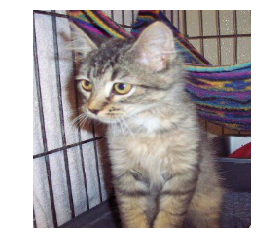

In [30]:
img = train_data[2]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [31]:
train_label = keras.utils.to_categorical(train_label, 2)
test_label = keras.utils.to_categorical(test_label, 2)

In [5]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), 
                 padding='valid', 
                 input_shape=(resize, resize, 3), 
                 activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5,5), 
                 padding='valid', 
                 activation='tanh')) #双曲正切函数作激活函数 tanhx = (e^x-e^-x)/(e^x+e^-x)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(2, activation='softmax')) #softmax函数做激活函数 e^x/(sum(e^x))

sgd = SGD(lr=0.01, decay=0, momentum=0, nesterov=True) #采用随机梯度下降法作为优化算法
model.compile(loss='binary_crossentropy',
              optimizer=sgd, 
              metrics=['accuracy'])

In [6]:
model.fit(train_data, train_label,
          batch_size = 64,
          epochs = 50,
          validation_split = 0.2,
          shuffle = True)

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 7s 2ms/step - loss: 0.7751 - acc: 0.5250 - val_loss: 0.7061 - val_acc: 0.5010
Epoch 2/50
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6675 - acc: 0.5875 - val_loss: 0.6492 - val_acc: 0.6320
Epoch 3/50
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6407 - acc: 0.6320 - val_loss: 0.6369 - val_acc: 0.6520
Epoch 4/50
4000/4000 [==============================] - 4s 1ms/step - loss: 0.6247 - acc: 0.6532 - val_loss: 0.6280 - val_acc: 0.6380
Epoch 5/50
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6088 - acc: 0.6637 - val_loss: 0.6193 - val_acc: 0.6660
Epoch 6/50
4000/4000 [==============================] - 4s 1ms/step - loss: 0.5937 - acc: 0.6770 - val_loss: 0.6230 - val_acc: 0.6510
Epoch 7/50
4000/4000 [==============================] - 5s 1ms/step - loss: 0.5736 - acc: 0.7043 - val_loss: 0.6279 - val_acc: 0.6460
Epoch 8/50
400

In [7]:
scores = model.evaluate(train_data, train_label, verbose=1)
print(scores)

5000/5000 [==============================] - 3s 653us/step
[0.32164469938129187, 0.9346]


In [8]:
scores = model.evaluate(test_data, test_label, verbose=1)
print(scores)

5000/5000 [==============================] - 3s 653us/step
[1.6604172050476074, 0.655]
